# Problem Set 3
## Learning from data [TIF285], Chalmers, Fall 2019

Last revised: 09-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged) and contains a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following **two** actions:
  - Upload of your solution in the form of a jupyter notebook, or python code, via Canvas.
  - Answer the corresponding questions on OpenTA.
  
  Note that the hand-in is not complete, and will not be graded, if any of those actions is not performed.

Fill your personal details
- Name: **Holmin, Sebastian**
- Personnummer: **970602-3679**
  <br/>
  (civic registration number)

## Problems
The 10 basic points of this problem set are distributed over four problems:
1. Assigning probabilities for a hundred-sided die (2 basic points)
2. Chi-squared hypothesis testing (2 basic points)
3. Gaussian process regression (3 basic points)
4. Neural network classification (3 basic points)

Each of them will be presented in a separate jupyter notebook.

# Problem 1: Assigning probabilities for a hundred-sided die
### (2 basic points)

Consider a hundred-sided die (labeled with 1, 2, 3, ..., 100) for which you know that the average result is 10.

Use the principle of maximum entropy to assign the probabilities $\{ p_i \}_{i=1}^{100}$ for the outcomes of a die roll.

*Hint: Use the method of Lagrange multipliers. See, e.g., Gregory section 8.6-7.*

*There are two constraints from the known information: the normalization of the probabilities $\sum_i p_i = 1$ and the average result $\sum_i i p_i = 10$. In lack of other information, it is best to set the Lebesque measure $m_i = \mathrm{constant}$.*

### Task
* Assign the probabilities and make a bar plot.
* The distribution looks like an exponential $e^{-\lambda i}$. What is its decay constant $\lambda$?

The problem will be maximizing the function
$$
Q = -\sum_i p_i \log \left( \frac{p_i}{m_i} \right) + \lambda_0 \left( 1 - \sum_i p_i \right) + \lambda_1 \left( \mu - \sum_i x_i p_i \right)
= -\sum_{i=1}^{100} p_i \log(p_i) 
+ \lambda_0 \left( 1 - \sum_{i=1}^{100} p_i \right)
+ \lambda_1 \left( 10 - \sum_{i=1}^{100} i p_i \right),
$$

$\partial Q / \partial p_j = 0$ gives

$$
p_i = \exp \left[ -(1+\lambda_0) \right] \exp \left[ -\lambda_1 i \right].
$$

We can then sum these to gain

$$
\sum_{i=1}^{100}p_i = 1 = \exp \left[ -(1+\lambda_0) \right] \sum_{i=1}^{100}\exp \left[ -\lambda_1 i \right]
$$

and

$$
\sum_{i=1}^{100}i p_j = 10 = \exp \left[ -(1+\lambda_0) \right] \sum_{i=1}^{100}i\exp \left[ -\lambda_1 i \right].
$$

The first of these gives

$$
\exp \left[ -(1+\lambda_0) \right] = \frac{1}{\sum_{i=1}^{100}\exp \left[ -\lambda_1 i \right]},
$$

which plugged into the other gives

$$
0 = \sum_{i=1}^{100}i \exp \left[ -\lambda_1 i \right] - 10 \sum_{i=1}^{100}\exp \left[ -\lambda_1 i \right].
$$

This we can now solve numerically for $\lambda_1$ and get $p_i$ from

$$
p_i = \frac{\exp \left[ -\lambda_1 i \right]}{\sum_{j=1}^{100}\exp \left[ -\lambda_1 j \right]} .
$$

lambda=  0.10533092306052393


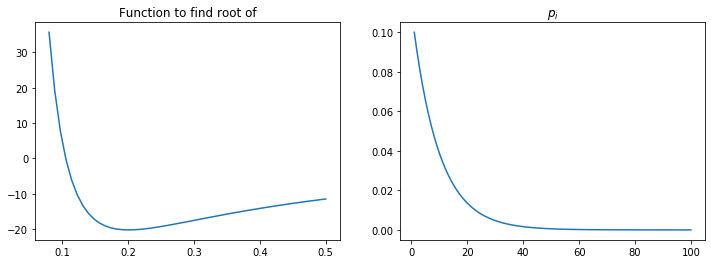

In [75]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2, figsize=(12,4))

def f(x):
    return sum([(i-10)*np.exp(-x*i) for i in range(1,101)])

axs[0].plot(np.linspace(0.08,0.5),f(np.linspace(0.08,0.5)))
axs[0].set_title('Function to find root of')
lmbda = fsolve(f,0)

def p(i):
    return np.exp(-lmbda*i)/sum([np.exp(-lmbda*j) for j in range(1,101)])[0]

axs[1].plot(range(1,101),p(range(1,101)))
axs[1].set_title('$p_i$')
print('lambda= ',lmbda[0])